<a href="https://colab.research.google.com/github/hariharan-075/ML/blob/main/2420080075_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


In [ ]:
iris = load_iris()

X = iris.data          # features
y = iris.target        # labels
target_names = iris.target_names

print("Original data shape:", X.shape)


Original data shape: (150, 4)


In [ ]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [ ]:
minmax = MinMaxScaler()
X_normalized = minmax.fit_transform(X)


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

print("PCA transformed shape:", X_pca.shape)


PCA transformed shape: (150, 2)


In [ ]:
print("Explained Variance Ratio:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

print("Cumulative Explained Variance:",
      np.cumsum(pca.explained_variance_ratio_))


Explained Variance Ratio:
PC1: 0.7296
PC2: 0.2285
Cumulative Explained Variance: [0.72962445 0.95813207]


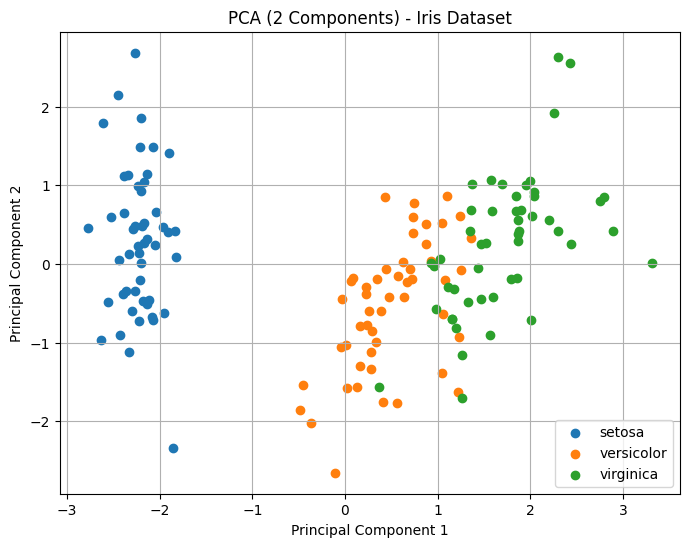

In [ ]:
plt.figure(figsize=(8,6))

for label, name in enumerate(target_names):
    plt.scatter(
        X_pca[y == label, 0],
        X_pca[y == label, 1],
        label=name
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (2 Components) - Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()


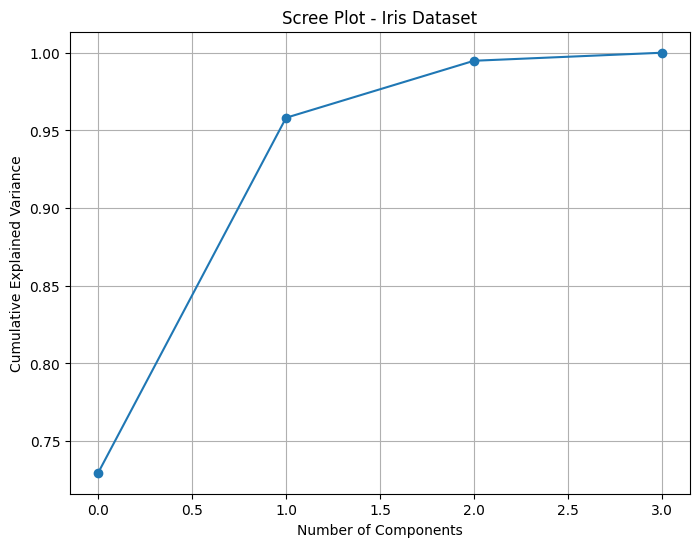

In [ ]:
pca_full = PCA()
pca_full.fit(X_standardized)

plt.figure(figsize=(8,6))
plt.plot(
    np.cumsum(pca_full.explained_variance_ratio_),
    marker='o'
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot - Iris Dataset")
plt.grid(True)
plt.show()


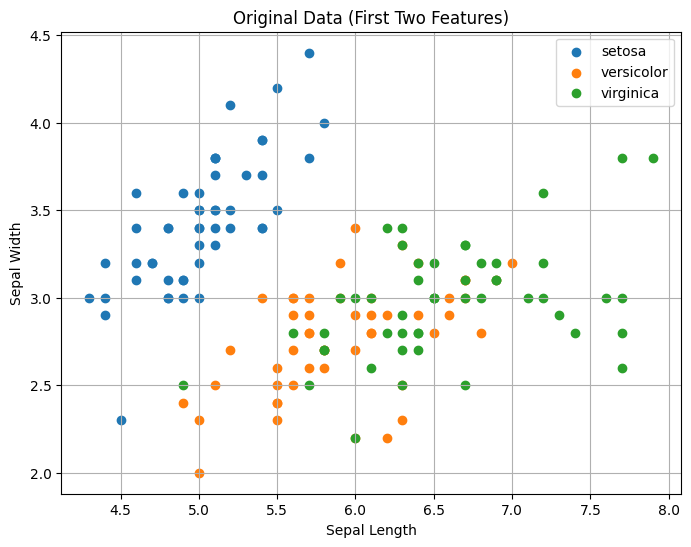

In [ ]:
plt.figure(figsize=(8,6))

for label, name in enumerate(target_names):
    plt.scatter(
        X[y == label, 0],
        X[y == label, 1],
        label=name
    )

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Original Data (First Two Features)")
plt.legend()
plt.grid(True)
plt.show()


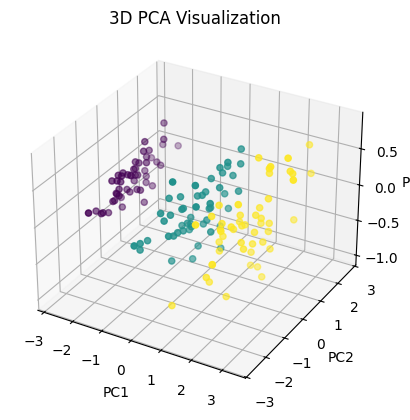

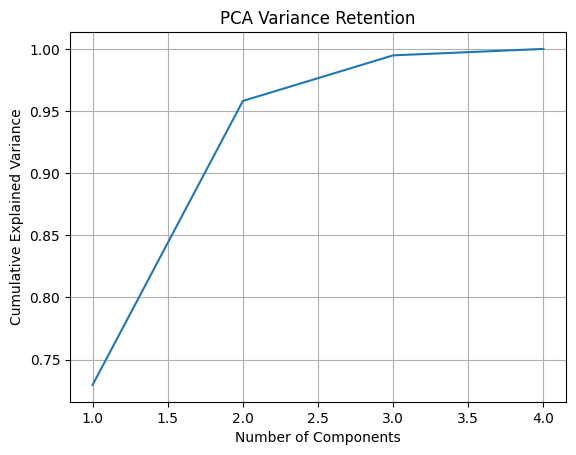

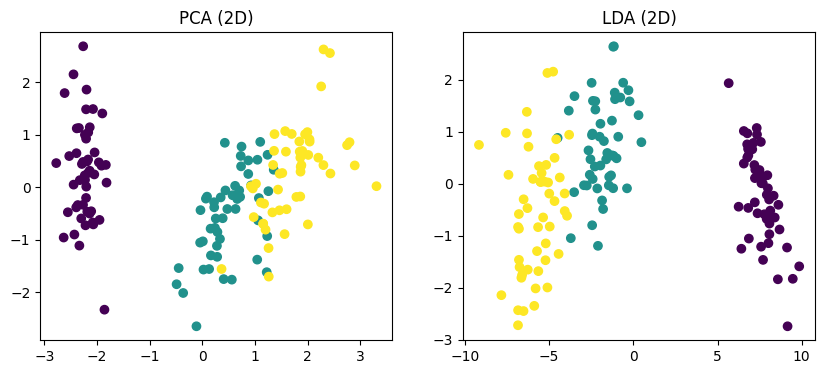

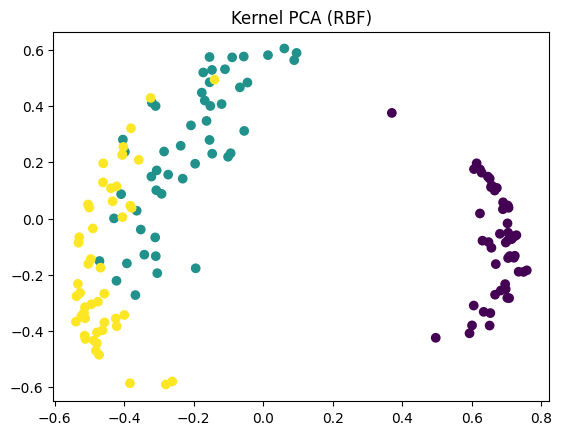

Reconstruction Error: 0.04186792799998359


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------------------------
# Load & Standardize Data
# -------------------------------------------------
data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------------------------
# 1. PCA – 3D Visualization
# -------------------------------------------------
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], c=y)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA Visualization")
plt.show()

# -------------------------------------------------
# 2. PCA with Different Components – Variance Retention
# -------------------------------------------------
pca_full = PCA()
pca_full.fit(X_scaled)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.plot(range(1, len(cum_var)+1), cum_var)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Variance Retention")
plt.grid()
plt.show()

# -------------------------------------------------
# 3. PCA vs LDA
# -------------------------------------------------
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=y)
plt.title("PCA (2D)")

plt.subplot(1,2,2)
plt.scatter(X_lda[:,0], X_lda[:,1], c=y)
plt.title("LDA (2D)")

plt.show()

# -------------------------------------------------
# 4. Kernel PCA (Non-Linear)
# -------------------------------------------------
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.1)
X_kpca = kpca.fit_transform(X_scaled)

plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y)
plt.title("Kernel PCA (RBF)")
plt.show()

# -------------------------------------------------
# 5. Reconstruction & Error Calculation
# -------------------------------------------------
pca_recon = PCA(n_components=2)
X_reduced = pca_recon.fit_transform(X_scaled)
X_reconstructed = pca_recon.inverse_transform(X_reduced)

error = mean_squared_error(X_scaled, X_reconstructed)
print("Reconstruction Error:", error)
